# <u> Modeling Exercises</u>

In [1]:

import warnings
warnings.filterwarnings("ignore")
from env import hostname, user, password
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import wrangle as w
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from pydataset import data




# Clustering with the Iris Dataset

##### Using this lesson as a guide, perform clustering on the iris dataset.

1. Choose features other than the ones used in the lesson.
* Visualize the results of your clustering.
* Use the elbow method to visually select a good value for k.
* Repeat the clustering, this time with 3 different features.
* Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [2]:
iris = data('iris')

In [3]:
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [4]:
iris = iris.rename(columns={'Sepal.Length': 'Sepal Length', 'Sepal.Width': 'Sepal_Width', 'Petal.Length': 'Petal_Length', 'Petal.Width':'Petal_Width', 'Species':'Species'})

In [5]:
iris.head(2)

,Sepal Length,Sepal_Width,Petal_Length,Petal_Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [6]:
iris_cluster = iris[['Petal_Length', 'Sepal_Width']]

In [7]:
iris_cluster.head(10)

,Petal_Length,Sepal_Width
1,1.4,3.5
2,1.4,3.0
3,1.3,3.2
4,1.5,3.1
5,1.4,3.6
6,1.7,3.9
7,1.4,3.4
8,1.5,3.4
9,1.4,2.9
10,1.5,3.1


In [8]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(iris_cluster)

kmeans.predict(iris_cluster)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [9]:
iris['iris_cluster'] = kmeans.predict(iris_cluster)

In [10]:
iris.head(3)

,Sepal Length,Sepal_Width,Petal_Length,Petal_Width,Species,iris_cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1


In [11]:
kmeans.cluster_centers_

array([[5.67209302, 3.03255814],
       [1.462     , 3.428     ],
       [4.32807018, 2.75087719]])

In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = iris_cluster.columns[:2])
centroids

,Petal_Length,Sepal_Width
0,5.672093,3.032558
1,1.462000,3.428000
2,4.328070,2.750877


## b. Visualize the results of your clustering.

### Visualization of original data

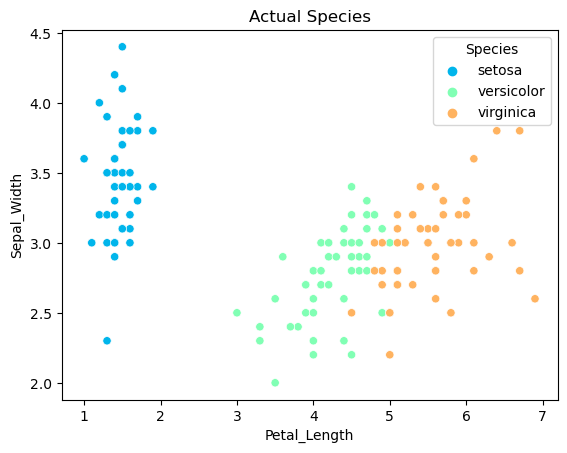

In [13]:
sns.scatterplot(iris, x = 'Petal_Length', y = 'Sepal_Width', hue='Species', palette = 'rainbow')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('PL vs SW by Species')
plt.title('Actual Species')

plt.show()

### Visualization of cluster

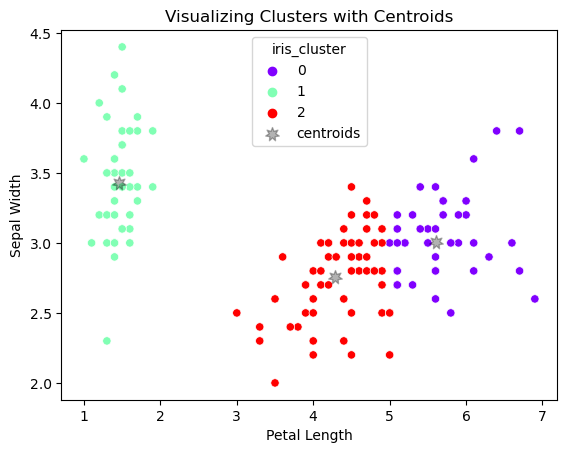

In [60]:
sns.scatterplot(iris, x = 'Petal_Length', y = 'Sepal_Width', hue = 'iris_cluster', palette = 'rainbow')

centroids.plot.scatter(x = 'Petal_Length', y = 'Sepal_Width', ax = plt.gca(), color ='k', alpha = 0.3, s = 100, marker = (7,1,0), label = 'centroids')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('PL vs SW by Clusters')
plt.title('Visualizing Clusters with Centroids')

plt.show()


### c. Use the elbow method to visually select a good value for k.

In [15]:
inertia_table = []

for n in range (1, 21):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(iris_cluster)
    inertia_table.append(kmeans.inertia_)
    

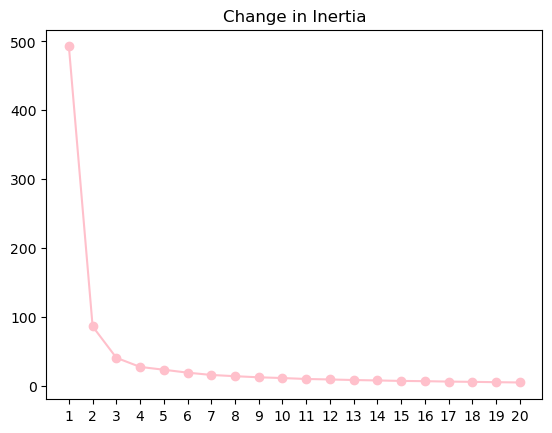

In [16]:
plt.plot(np.arange(1,21,), inertia_table,marker='o', color='pink')

plt.xticks(np.arange(1,21,step=1,))


plt.title('Change in Inertia')

plt.show()

### d. Repeat the clustering, this time with 3 different features.

In [17]:
three_features = iris[['Petal_Length', 'Sepal_Width', 'Petal_Width']]

In [18]:
three_features.head(3)

,Petal_Length,Sepal_Width,Petal_Width
1,1.4,3.5,0.2
2,1.4,3.0,0.2
3,1.3,3.2,0.2


In [19]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(three_features)

kmeans.predict(three_features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
iris['3_features'] = kmeans.predict(three_features)

In [21]:
iris.head(3)

,Sepal Length,Sepal_Width,Petal_Length,Petal_Width,Species,iris_cluster,3_features
1,5.1,3.5,1.4,0.2,setosa,1,0
2,4.9,3.0,1.4,0.2,setosa,1,0
3,4.7,3.2,1.3,0.2,setosa,1,0


In [22]:
kmeans.cluster_centers_

array([[1.462     , 3.428     , 0.246     ],
       [5.6106383 , 3.00425532, 2.04255319],
       [4.28113208, 2.75471698, 1.3509434 ]])

In [23]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = three_features.columns[:3])

centroids

,Petal_Length,Sepal_Width,Petal_Width
0,1.462000,3.428000,0.246000
1,5.610638,3.004255,2.042553
2,4.281132,2.754717,1.350943


### 2. How does scaling impact the results of clustering?

In [24]:
sql = 'select * from customers'
mall = w.get_mall_data(sql)

In [25]:
w.get_mall_data(sql)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [26]:
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [28]:
mall.head(4)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77


In [29]:
mall['is_male'] = pd.get_dummies(mall.gender, drop_first=True)

In [30]:
mall.head()

,gender,age,annual_income,spending_score,is_male
customer_id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [33]:
age_income = mall[['age', 'annual_income']]

In [32]:
age_income.head(3)

,age,annual_income
customer_id,,
1,19,15
2,21,15
3,20,16


In [34]:
mall_1_inertia = []

for n in range(1,11):
    
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(age_income)
    mall_1_inertia.append(kmeans.inertia_)

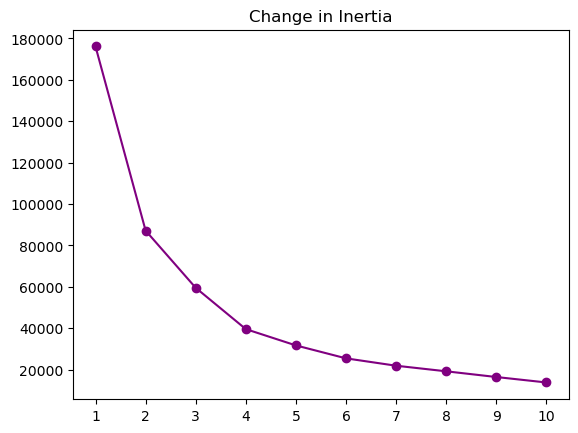

In [35]:
plt.plot(np.arange(1,11,), mall_1_inertia, marker='o', color='purple')

plt.xticks(np.arange(1,11,step=1))

plt.title('Change in Inertia')

plt.show()

In [36]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(age_income)

kmeans.predict(age_income)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [37]:
mall['age_income']  = kmeans.predict(age_income)

In [38]:
mall.head(3)

,gender,age,annual_income,spending_score,is_male,age_income
customer_id,,,,,,
1,Male,19,15,39,1,1
2,Male,21,15,81,1,1
3,Female,20,16,6,0,1


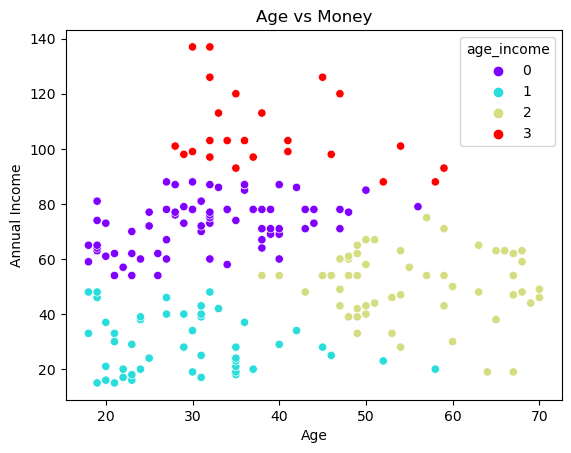

In [58]:
sns.scatterplot(mall, x = 'age', y='annual_income', hue='age_income', palette= 'rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Money')
plt.show()

#### 3. Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [40]:
sql = 'select * from customers'

In [41]:
w.get_mall_data(sql).head(3)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


In [42]:
mall = mall.drop(columns = 'gender')

In [43]:
mall.head()

,age,annual_income,spending_score,is_male,age_income
customer_id,,,,,
1,19,15,39,1,1
2,21,15,81,1,1
3,20,16,6,0,1
4,23,16,77,0,1
5,31,17,40,0,1


In [44]:
scaler = MinMaxScaler().set_output(transform='pandas')

In [45]:
mall_scaled = scaler.fit_transform(mall)

In [46]:
age_income_scale = mall_scaled[['age', 'annual_income']]

In [47]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(age_income_scale)

kmeans.predict(age_income_scale)

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [48]:
mall['age_income_scale'] = kmeans.predict(age_income_scale)

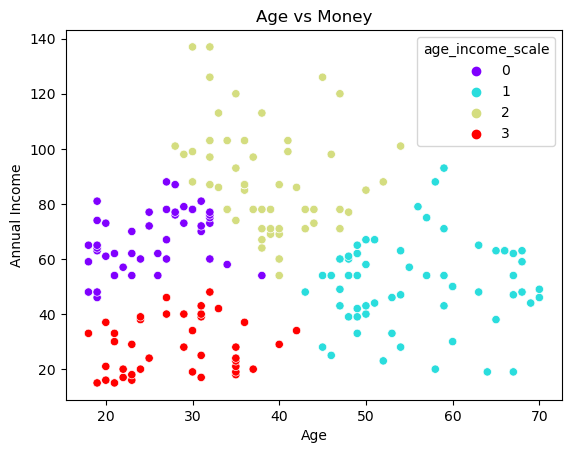

In [57]:
sns.scatterplot(mall, x = 'age', y='annual_income', hue='age_income_scale', palette= 'rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Money')
plt.show()

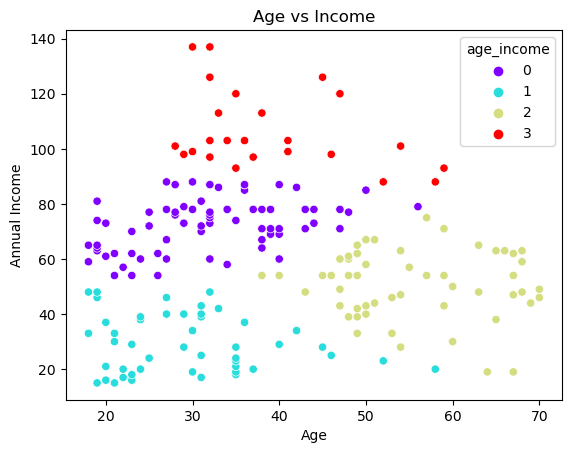

In [55]:
sns.scatterplot(mall, x = 'age', y='annual_income', hue='age_income', palette= 'rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Income')
plt.show()
